In [2]:
import os, sys

import pymongo as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import json
import re

import matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

from IPython.display import clear_output
import importlib

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

### Load in data

The goal of this notebook is to identify the object part labels needed for devphotodraw

* airplane, car, bike
* bird, cat, rabbit
* chair, house, tree
* cup, hat, watch

Note: some of the labels had previously been collected through 'part_naming' and 'kiddraw_annotations'. So we only need to generate labels for: `'bike', 'chair', 'house', 'watch'`

In [19]:
dev_data = pd.read_csv('/Users/hollyhuey/part_naming/results/csv/devphotodraw_labels_part_attributes.csv')

In [32]:
## how many labels were generated per category?
numLabels = part_freq.groupby(['category'])['category'].count().reset_index(name='numLabels')
display(numLabels)

,category,numLabels
0,bike,46
1,chair,27
2,house,60
3,watch,64


In [33]:
## count how many times each part is identified
part_freq = dev_data.groupby(['category', 'attributes_lemmatized'])['attributes_lemmatized'].count().reset_index(name='freq')
sorted_parts = part_freq.sort_values(by=['category', 'freq'], ascending=False).reset_index(drop=True)

## subset the 15 most frequent labels of each category
subset_top15 = sorted_parts.groupby('category').head(15).reset_index(drop=True)

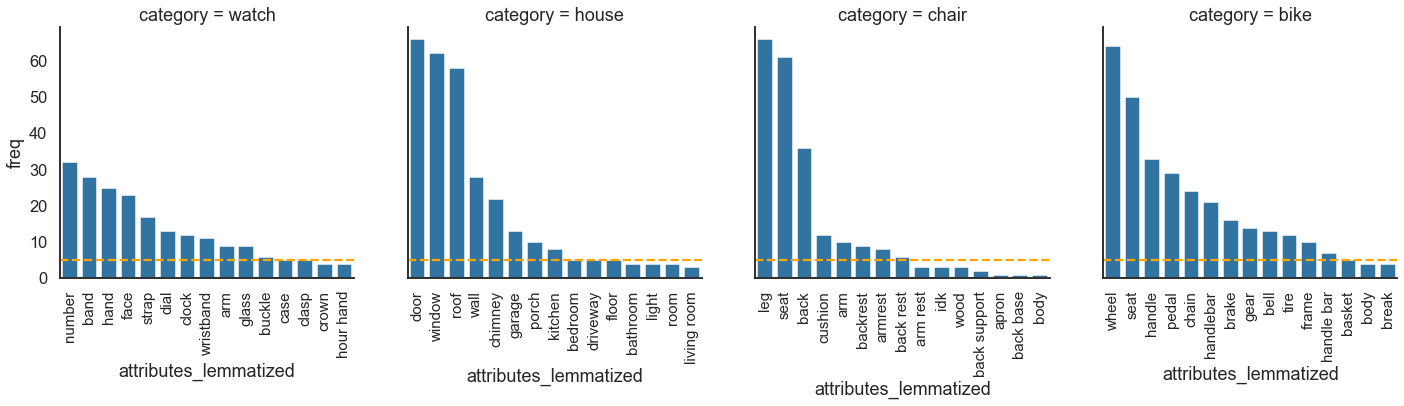

In [34]:
g = sns.FacetGrid(data=subset_top15, 
                  height=5, 
                  col='category',
                  sharex=False,
                 )
g.map_dataframe(sns.barplot, 
      x="attributes_lemmatized", 
      y="freq")

ax1, ax2, ax3, ax4 = g.axes[0]

ax1.axhline(5, ls='--', c='orange')
ax2.axhline(5, ls='--', c='orange')
ax3.axhline(5, ls='--', c='orange')
ax4.axhline(5, ls='--', c='orange')

[plt.setp(ax.get_xticklabels(), rotation=90, size=15) for ax in g.axes.flat]
plt.show()

In [43]:
## subset labels that have a frequency of 5+
subset_freq5 = subset_top15.loc[subset_top15['freq'] >= 5].reset_index(drop=True)
subset_freq5

,category,attributes_lemmatized,freq
0,watch,number,32
1,watch,band,28
2,watch,hand,25
3,watch,face,23
4,watch,strap,17
5,watch,dial,13
6,watch,clock,12
7,watch,wristband,11
8,watch,arm,9
9,watch,glass,9
